In [35]:
import pandas as pd

df = pd.read_csv(
    'C:/Users/Pro/Desktop/UCRArchive_2018/NonInvasiveFetalECGThorax1/NonInvasiveFetalECGThorax1_TEST.tsv',
    sep='\t',
    header=None
)

In [36]:
# 첫 번째 열: 클래스 라벨
# 나머지 열: 시계열 데이터
labels = df.iloc[:, 0].values
series = df.iloc[:, 1:].values

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,741,742,743,744,745,746,747,748,749,750
0,1,3.320200,3.320200,3.276544,3.173178,3.037987,2.843506,2.555513,2.141900,1.624651,...,0.969205,1.114386,1.299419,1.528107,1.811010,2.132790,2.436824,2.745365,3.028701,3.198532
1,3,3.285248,3.285248,3.245219,3.144353,2.944247,2.636854,2.240286,1.784940,1.300740,...,1.085435,1.256336,1.443762,1.653622,1.914253,2.221808,2.548545,2.860300,3.106383,3.224371
2,31,3.986274,3.977561,3.890562,3.729879,3.504688,3.229520,2.927219,2.654193,2.446553,...,2.227593,2.512738,2.771558,2.980684,3.143237,3.275985,3.420985,3.578316,3.717398,3.816153
3,15,4.208807,4.198493,4.139280,4.034526,3.885833,3.693705,3.465858,3.234359,3.008344,...,2.400547,2.650340,2.847310,2.988131,3.086583,3.221668,3.396778,3.568780,3.720722,3.866993
4,41,4.124322,4.096476,4.006952,3.838741,3.606711,3.331367,3.018474,2.719126,2.477735,...,2.236856,2.531163,2.810759,3.061376,3.257810,3.409388,3.548620,3.687852,3.821665,3.933050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,18,3.790829,3.691666,3.509867,3.278486,3.010378,2.712889,2.393363,2.055474,1.754312,...,2.067716,2.393975,2.689628,2.889791,3.011909,3.091484,3.177793,3.303889,3.458143,3.557306
1961,29,3.838080,3.835355,3.782401,3.686742,3.554113,3.387818,3.180044,2.907473,2.614492,...,2.104989,2.417201,2.722418,2.989814,3.189413,3.328624,3.444770,3.568639,3.709867,3.844750
1962,12,3.191759,3.180782,3.135725,3.045793,2.904169,2.701182,2.432373,2.130495,1.775533,...,2.097365,2.389460,2.694663,2.936165,3.116253,3.208925,3.269391,3.346684,3.447662,3.532737
1963,18,3.462029,3.368502,3.174639,2.920388,2.637429,2.342940,2.034422,1.702486,1.375386,...,2.004396,2.374909,2.740067,3.056227,3.268169,3.380659,3.436498,3.489085,3.567217,3.628370


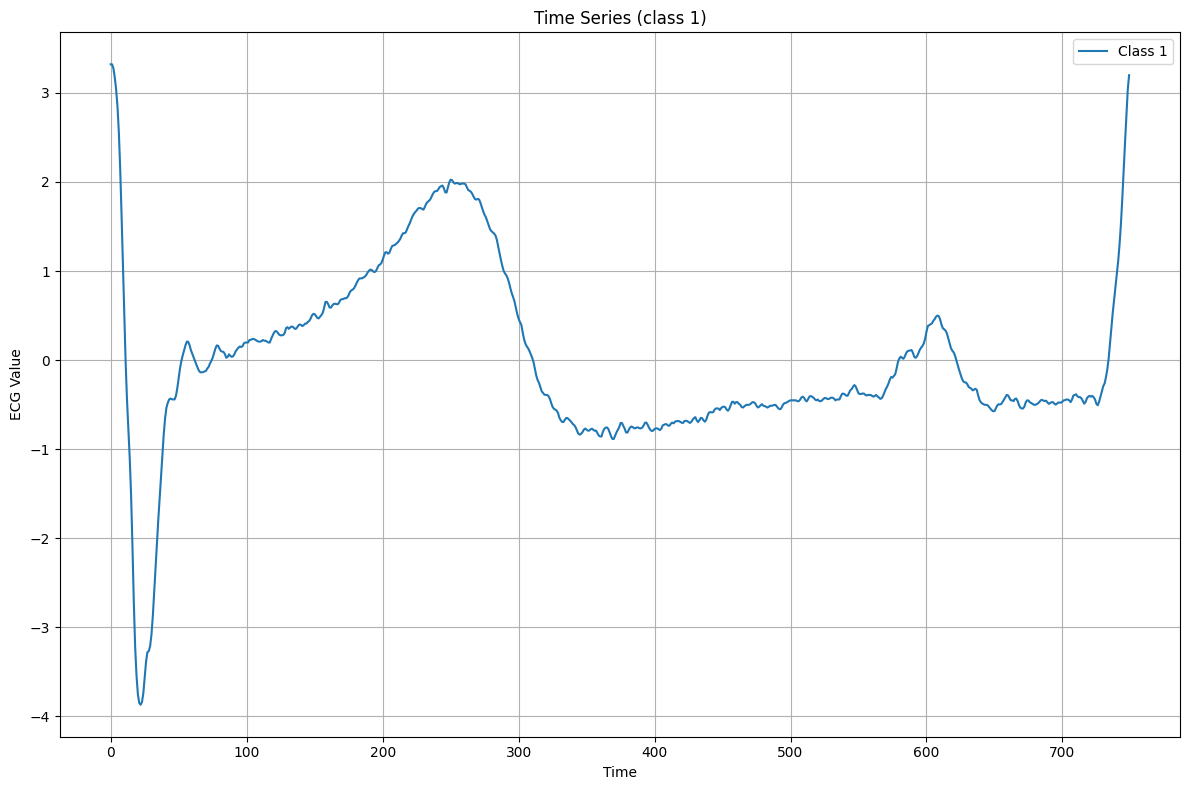

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Pro/Desktop/UCRArchive_2018/NonInvasiveFetalECGThorax1/NonInvasiveFetalECGThorax1_TEST.tsv'
df = pd.read_csv(file_path, sep='\t', header=None)

# Extract labels and time series
labels = df.iloc[:, 0].values
series = df.iloc[:, 1:].values

# Plot one example from each of the first 5 classes
plt.figure(figsize=(12, 8))
unique_labels = sorted(set(labels))[:1]

for i, label in enumerate(unique_labels):
    sample_idx = list(labels).index(label)  # get the first occurrence of each class
    plt.plot(series[sample_idx], label=f'Class {label}')

plt.title('Time Series (class 1)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


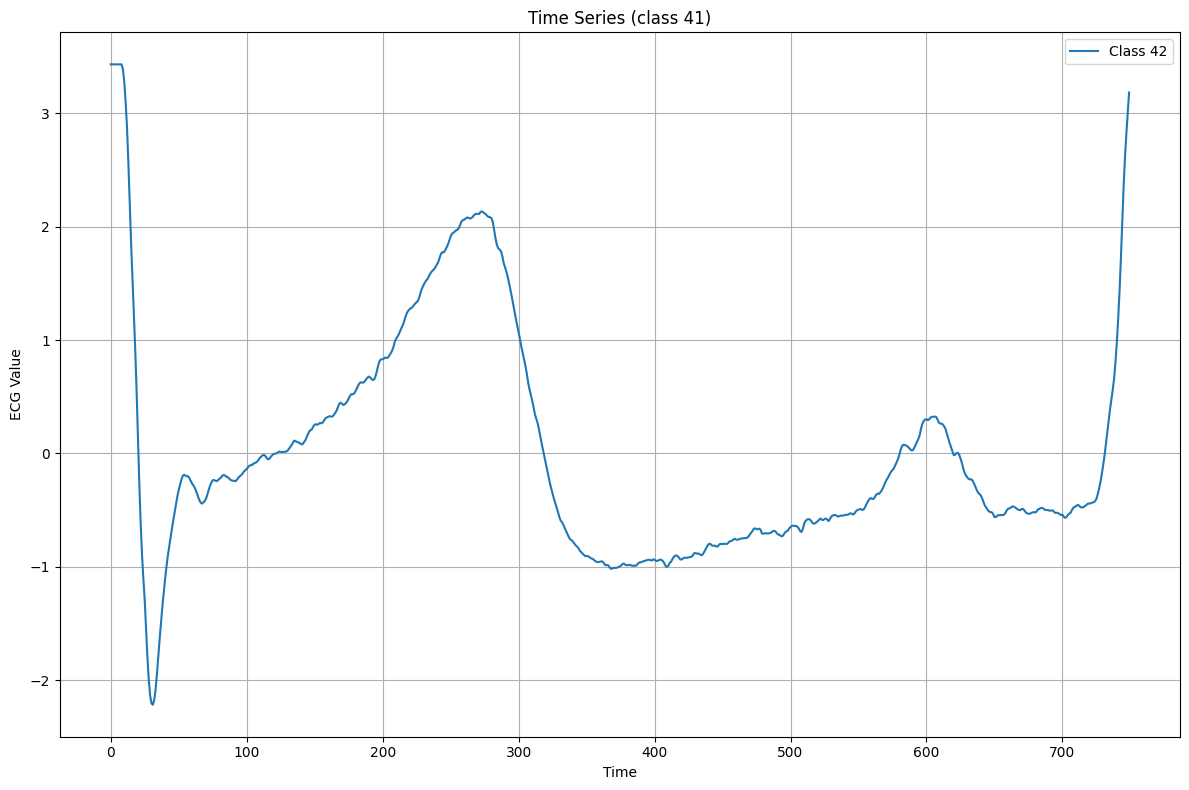

In [39]:
# Plot one example from each of the first 5 classes
plt.figure(figsize=(12, 8))
unique_labels = sorted(set(labels))[41:]

for i, label in enumerate(unique_labels):
    sample_idx = list(labels).index(label)  # get the first occurrence of each class
    plt.plot(series[sample_idx], label=f'Class {label}')

plt.title('Time Series (class 41)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

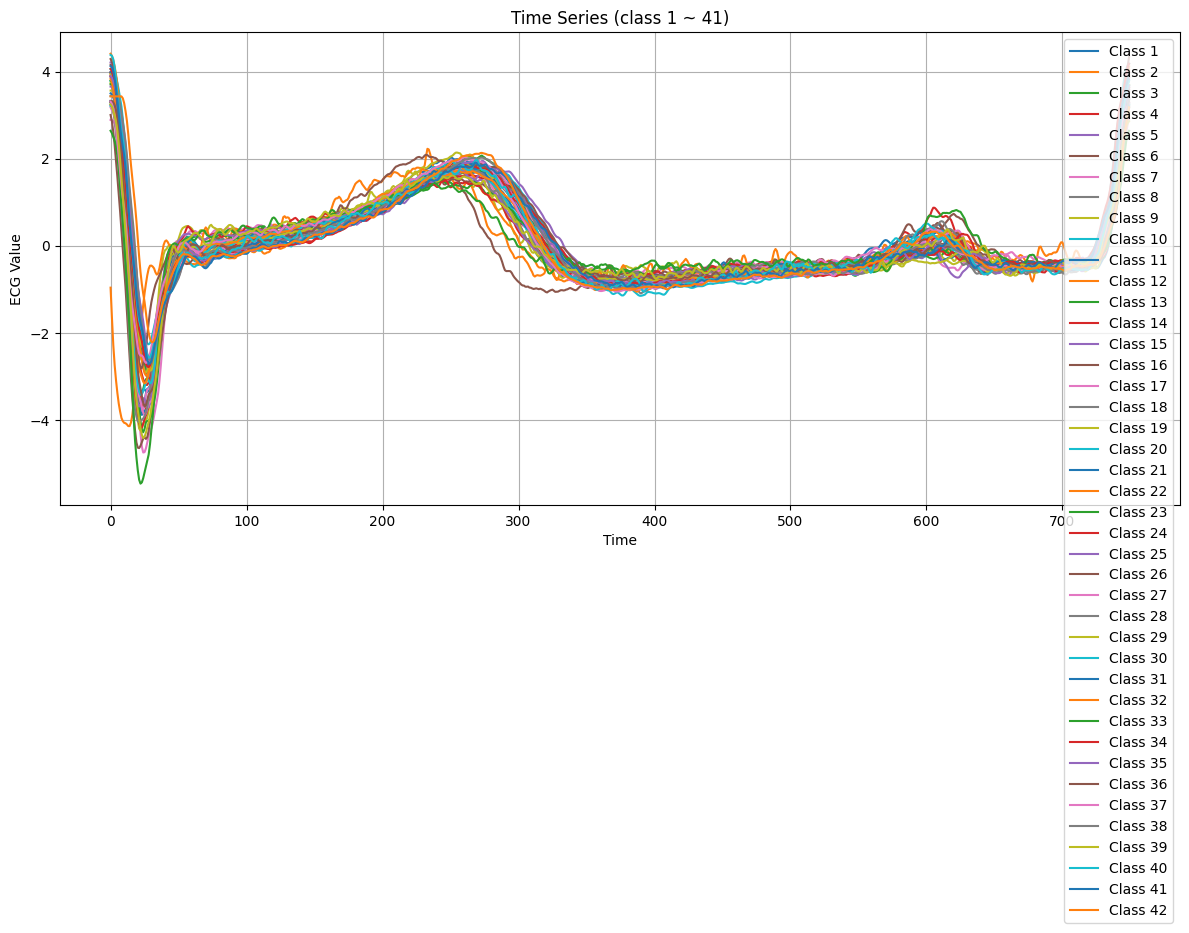

In [40]:
# Plot one example from each of the first 5 classes
plt.figure(figsize=(12, 8))
unique_labels = sorted(set(labels))[:]

for i, label in enumerate(unique_labels):
    sample_idx = list(labels).index(label)  # get the first occurrence of each class
    plt.plot(series[sample_idx], label=f'Class {label}')

plt.title('Time Series (class 1 ~ 41)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
import numpy as np

def inject_mean_shift(x, start=500, delta=2.0):
    """
    시계열 x에 평균을 변화시키는 이상치 삽입
    start 시점부터 값을 delta만큼 증가시킴
    """
    x_anom = x.copy()
    x_anom[start:] += delta
    return x_anom


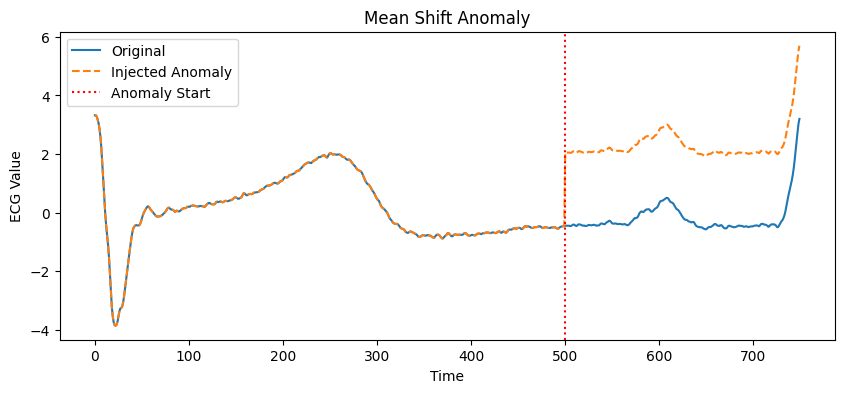

In [42]:
import matplotlib.pyplot as plt

x_original = series[0]
x_anomalous = inject_mean_shift(x_original, start=500, delta=2.5)

plt.figure(figsize=(10, 4))
plt.plot(x_original, label='Original')
plt.plot(x_anomalous, label='Injected Anomaly', linestyle='--')
plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.legend()
plt.title('Mean Shift Anomaly')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.show()


In [43]:
x_anomalous

array([ 3.3201995 ,  3.3201995 ,  3.2765438 ,  3.1731778 ,  3.0379871 ,
        2.8435058 ,  2.5555132 ,  2.1419003 ,  1.6246507 ,  1.0641786 ,
        0.49807517, -0.03448439, -0.44819201, -0.76997212, -1.1027575 ,
       -1.5179001 , -2.0863047 , -2.7200238 , -3.2246707 , -3.5445422 ,
       -3.7529256 , -3.8497534 , -3.8683257 , -3.8397092 , -3.7398221 ,
       -3.5687051 , -3.3863797 , -3.2789934 , -3.2667156 , -3.2101053 ,
       -3.0790974 , -2.8696446 , -2.605287  , -2.3316703 , -2.0515696 ,
       -1.7916385 , -1.5514033 , -1.3067822 , -1.0593725 , -0.83535422,
       -0.65304239, -0.53340533, -0.47850061, -0.44120709, -0.43177203,
       -0.44009708, -0.44135599, -0.44135599, -0.40074599, -0.31381351,
       -0.19930685, -0.09062095, -0.0081285 ,  0.0546681 ,  0.11127844,
        0.1660478 ,  0.20753768,  0.20580499,  0.16806476,  0.11199589,
        0.07230638,  0.03456615, -0.01022668, -0.05105327, -0.0887935 ,
       -0.12159284, -0.13718708, -0.13718708, -0.13435792, -0.12

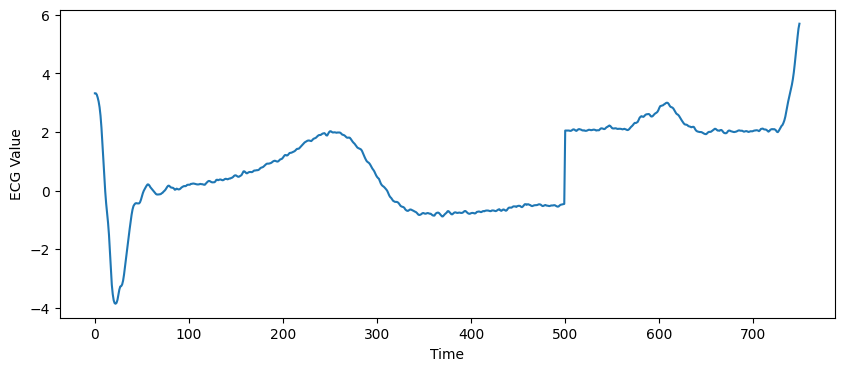

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(x_anomalous, label='Injected Anomaly', linestyle='-')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.show()

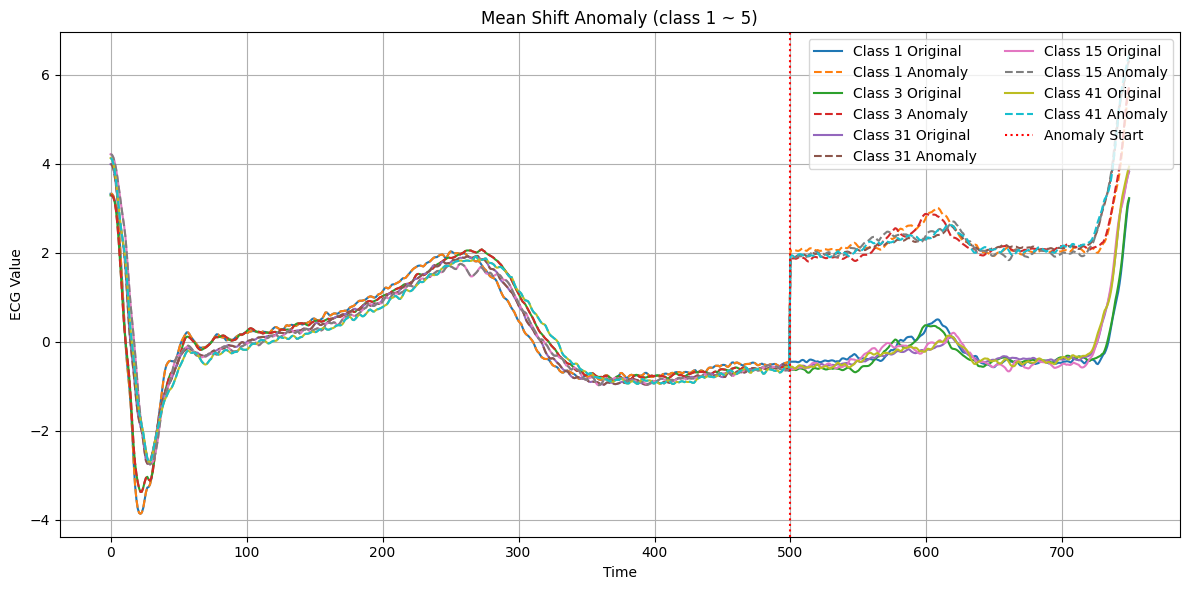

In [45]:
# 이상치 삽입 함수
def inject_mean_shift_batch(series_data, start=500, delta=2.0):
    original = series_data.copy()
    modified = series_data.copy()
    modified[:, start:] += delta
    return original, modified

# 이상치 삽입
original_series, anomalous_series = inject_mean_shift_batch(series, start=500, delta=2.5)

# 시각화
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(original_series[i], label=f'Class {labels[i]} Original', linestyle='-')
    plt.plot(anomalous_series[i], label=f'Class {labels[i]} Anomaly', linestyle='--')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.title('Mean Shift Anomaly (class 1 ~ 5)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

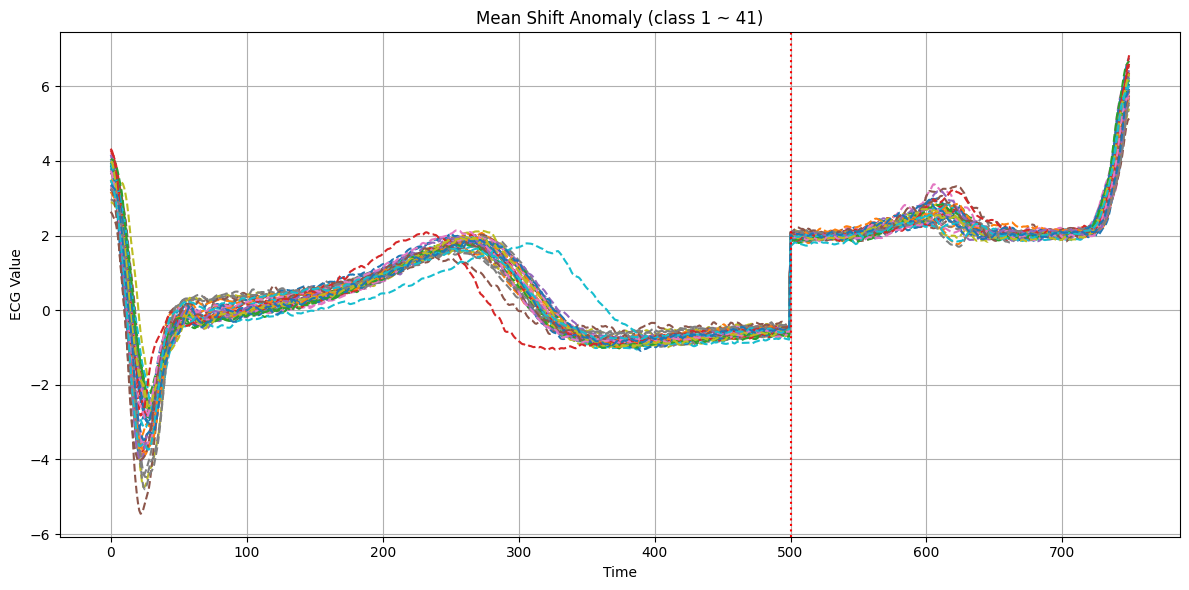

In [46]:
# 시각화
plt.figure(figsize=(12, 6))
for i in range(41):
    plt.plot(anomalous_series[i], label=f'Class {labels[i]} Anomaly', linestyle='--')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.title('Mean Shift Anomaly (class 1 ~ 41)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# 이상치가 삽입된 시계열(anomalous_series)을 CSV로 저장
anomalous_df = pd.DataFrame(anomalous_series)
anomalous_df.insert(0, 'label', labels)  # 첫 열에 라벨 삽입

# 저장
output_path = "C:/Users/Pro/Desktop/NonInvasiveFetalECGThorax1_TEST_with_anomaly.csv"
anomalous_df.to_csv(output_path, index=False)

output_path

'C:/Users/Pro/Desktop/NonInvasiveFetalECGThorax1_TEST_with_anomaly.csv'

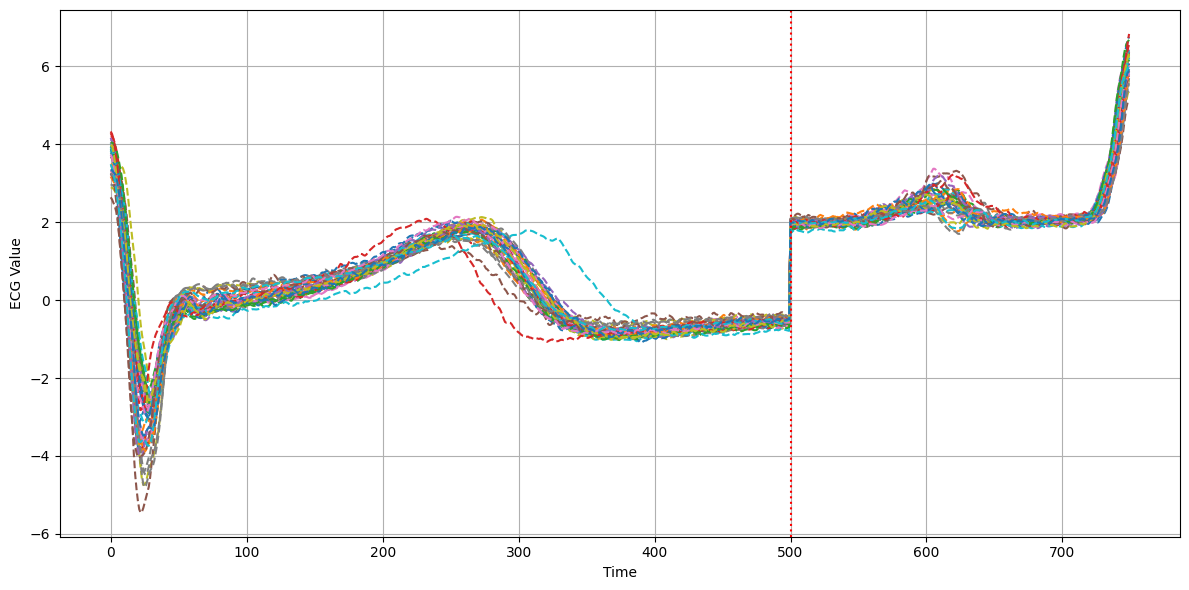

In [51]:
loaded_df = pd.read_csv("C:/Users/Pro/Desktop/NonInvasiveFetalECGThorax1_TEST_with_anomaly.csv")

# 시각화를 위한 데이터 분리
loaded_labels = loaded_df['label'].values
loaded_series = loaded_df.drop(columns=['label']).values

# 시각화: 클래스 1~5 중 하나씩 샘플 선택
plt.figure(figsize=(12, 6))
for i in range(41):
    plt.plot(loaded_series[i], label=f'Class {loaded_labels[i]} Anomalous', linestyle='--')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()